In [3]:
#oracle connection test
import cx_Oracle as ora
import pandas as pd

tns = '10.66.5.27:1521/hnacard_standby1'
uname = 'card_read'
upwd = 't0Wz3pKBxl$A'

db = ora.connect(uname, upwd, tns)
print(db.version)
sql0 = 'select 1 from dual'
df0 = pd.read_sql(sql0, db)
print(df0)


11.2.0.4.0
   1
0  1


In [4]:
#after connected to oracle, let's query some data
import numpy as np

sql2 = """
 select  ta.http_record_id,
       ta.async_msg_id,
       ta.status_code,
       ta.response_content,
       ta.request_content,
       ta.request_time,
       ta.response_time,
       ta.url_method,
       ta.url,
       ta.merchant_code,ta.ranks rn,to_char(ta.request_time,'yyyy-MM-dd HH24:mi:ss' ) request_time,ta.retry_count from (
select row_number() over(partition by ts.async_msg_id order by ts.request_time desc ) ranks,ts.*,t.retry_count from card_business.T_HTTP_RECORD_INFO ts,card_business.T_FAILED_REQUEST_INFO t  
where  ts.request_time >= trunc(sysdate - 2,'day') 
   and ts.request_time < trunc(sysdate - 1,'day') and ts.merchant_code='114400001011124' 
   and   t.retry_count>=5 and t.queue_name='hnacard.notification.http' and t.async_msg_id = ts.async_msg_id
        and  t.create_date >= trunc(sysdate - 2,'day') 
   and t.create_date < trunc(sysdate - 1,'day')
) ta where ta.ranks =1  order by ta.request_time desc 
"""
df2 = pd.read_sql(sql2, db)

#genrate df1
df1 = np.random.rand(3, 3)
#print(df1)
#genrate df3
df3 = pd.DataFrame([])

print('print df1:')
print(df1)
print('print df2:')
print(df2)
print('print df3:')
print(df3)

#juge df is null
print('df1 is null or not:')
#df1.isnull()
#df1.empty
print('df2 is null or not:')
#df2.isnull()
df2.empty
print('df3 is null or not:')
#df3.isnull
df3.empty

print df1:
[[0.08467151 0.48628783 0.72086751]
 [0.60773737 0.1106425  0.01019673]
 [0.96451218 0.83588291 0.21484403]]
print df2:
Empty DataFrame
Columns: [HTTP_RECORD_ID, ASYNC_MSG_ID, STATUS_CODE, RESPONSE_CONTENT, REQUEST_CONTENT, REQUEST_TIME, RESPONSE_TIME, URL_METHOD, URL, MERCHANT_CODE, RN, REQUEST_TIME, RETRY_COUNT]
Index: []
print df3:
Empty DataFrame
Columns: []
Index: []
df1 is null or not:
df2 is null or not:
df3 is null or not:


True

         TDATE          TABLESPACE_NAME  USED_SPACE_M
0   2023-04-01   TBS_CARD_ACQUIRE_DATA1        383249
1   2023-04-01       TBS_CARD_TXN_DATA1        230638
2   2023-04-01        TBS_CARD_TXN_IDX1        192298
3   2023-04-01  TBS_CARD_BUSINESS_DATA1        121775
4   2023-04-01    TBS_CARD_ACCOUNT_IDX1         93703
..         ...                      ...           ...
593 2023-04-23    TBS_CARD_PORTAL_DATA1            30
594 2023-04-23     TBS_CARD_PORTAL_IDX1             5
595 2023-04-23  TBS_CARD_CLEAR_DATA_HIS             3
596 2023-04-23     TBS_CARD_REPORT_IDX1             1
597 2023-04-23    TBS_CARD_REPORT_DATA1             1

[598 rows x 3 columns]
['TBS_CARD_ACQUIRE_DATA1' 'TBS_CARD_TXN_DATA1' 'TBS_CARD_TXN_IDX1'
 'TBS_CARD_BUSINESS_DATA1' 'TBS_CARD_ACCOUNT_IDX1'
 'TBS_CARD_ACCOUNT_DATA1' 'TBS_CARD_ISSUE_DATA1' 'TBS_CARD_ACQUIRE_IDX1'
 'TBS_CARD_BUSINESS_IDX1' 'TBS_CARD_CLEAR_DATA1' 'TBS_CARD_CLEAR_IDX1'
 'TBS_CARD_ISSUE_IDX1' 'TBS_CARD_CUSTOMER_DATA1' 'TBS_CARD_CUSTOME

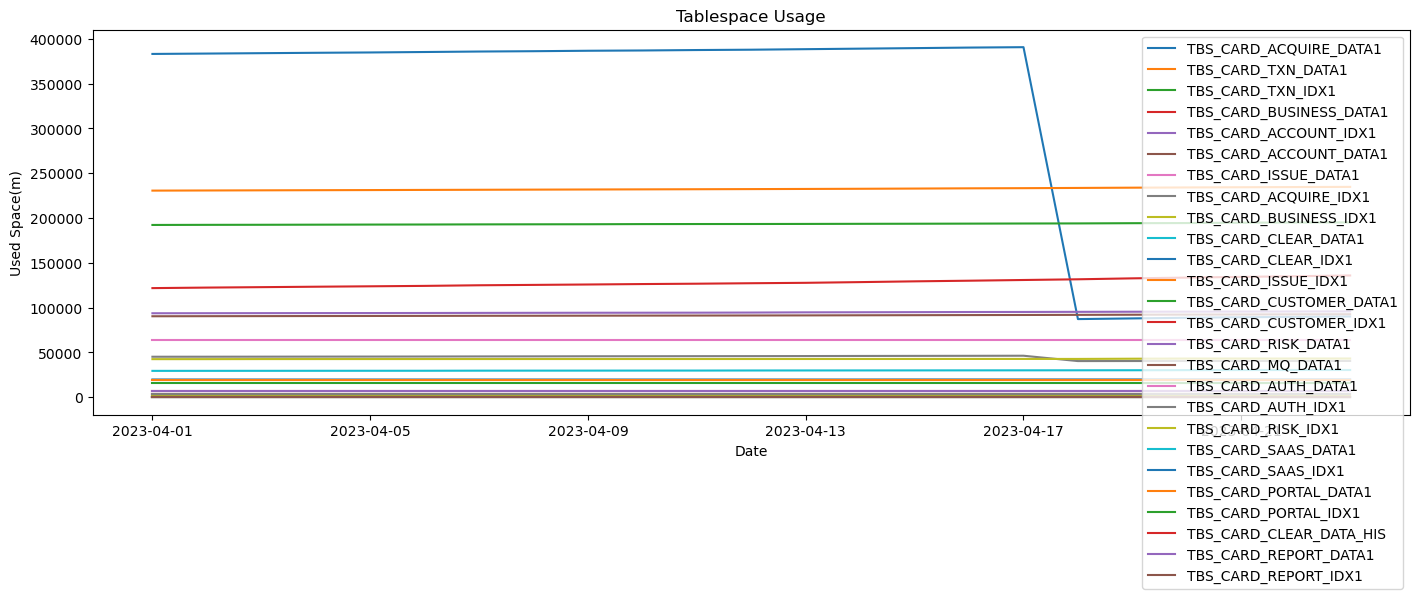

"\nimport pandas as pd\nimport matplotlib.pyplot as plt\n # 读取数据\ndf = pd.read_csv('tablespace_df.csv', parse_dates=['tdate'])\n # 绘制图形\nfig, ax = plt.subplots(figsize=(10,5))\n # 获取所有的tablespace名称\ntablespace_names = df['tablespace_name'].unique()\n # 画出每一个tablespace名称所对应的曲线\nfor tablespace_name in tablespace_names:\n    tablespace_data = df[df['tablespace_name']==tablespace_name]\n    ax.plot(tablespace_data['tdate'], tablespace_data['used_space_m'], label=tablespace_name)\n # 设置X轴和Y轴的名称\nax.set_xlabel('Date')\nax.set_ylabel('Used Space(m)')\n # 设置图例和标题\nax.legend()\nax.set_title('Tablespace Usage')\n # 显示图形\nplt.show()\n\nimport pandas as pd\nimport matplotlib.pyplot as plt\n # 读取数据\ndata = pd.read_csv('data.csv')\n # 绘制柱状图\nfig, ax = plt.subplots(figsize=(10, 5))\nax.bar(data['category'], data['value'], color='blue')\n # 设置X轴和Y轴的名称和标题\nax.set_xlabel('Category')\nax.set_ylabel('Value')\nax.set_title('Bar Chart')\n # 旋转X轴标签\nplt.xticks(rotation=45)\n # 显示图形\nplt.show()\n"

In [34]:
#oracle tablespace size monitor hourly test
import cx_Oracle as ora
import pandas as pd
import matplotlib.pyplot as plt

tns = '10.66.5.27:1521/hnacard_standby1'
uname = 'moonkin'
upwd = 'QgpdFsAI8GXPCL3p'

db_moonkin = ora.connect(uname, upwd, tns)
#print(db_moonkin.version)
tablespace_sql = "select trunc(time, 'dd') as tdate, tablespace_name, used_space_m from TOTAL_SPACE where time > trunc(sysdate, 'mm') order by tdate , used_space_m desc"
tablespace_df = pd.read_sql(tablespace_sql, db_moonkin)
print(tablespace_df)
#tablespace_df = pd.pivot_table(tablespace_df, values=[u'USED_SPACE_M'], index=[ u'TDATE', u'TABLESPACE_NAME'])
#print(tablespace_df)
'''
tablespace_df.plot(kind='line')
plt.show()
'''
 # 绘制图形
fig, ax = plt.subplots(figsize=(17,5))
 # 获取所有的tablespace名称
tbs = tablespace_df['TABLESPACE_NAME'].unique()
print(tbs)
 # 画出每一个tablespace名称所对应的曲线
for tablespace_name in tbs:
    tablespace_data = tablespace_df[tablespace_df['TABLESPACE_NAME']==tablespace_name]
    ax.plot(tablespace_data['TDATE'], tablespace_data['USED_SPACE_M'], label=tablespace_name)
#    ax.bar(tablespace_data['TDATE'], tablespace_data['USED_SPACE_M'], label=tablespace_name)
 # 设置X轴和Y轴的名称
ax.set_xlabel('Date')
ax.set_ylabel('Used Space(m)')
 # 设置图例和标题
ax.legend()
ax.set_title('Tablespace Usage')

#plt.xticks(rotation=45)
 # 显示图形
plt.show()

'''
import pandas as pd
import matplotlib.pyplot as plt
 # 读取数据
df = pd.read_csv('tablespace_df.csv', parse_dates=['tdate'])
 # 绘制图形
fig, ax = plt.subplots(figsize=(10,5))
 # 获取所有的tablespace名称
tablespace_names = df['tablespace_name'].unique()
 # 画出每一个tablespace名称所对应的曲线
for tablespace_name in tablespace_names:
    tablespace_data = df[df['tablespace_name']==tablespace_name]
    ax.plot(tablespace_data['tdate'], tablespace_data['used_space_m'], label=tablespace_name)
 # 设置X轴和Y轴的名称
ax.set_xlabel('Date')
ax.set_ylabel('Used Space(m)')
 # 设置图例和标题
ax.legend()
ax.set_title('Tablespace Usage')
 # 显示图形
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
 # 读取数据
data = pd.read_csv('data.csv')
 # 绘制柱状图
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(data['category'], data['value'], color='blue')
 # 设置X轴和Y轴的名称和标题
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Bar Chart')
 # 旋转X轴标签
plt.xticks(rotation=45)
 # 显示图形
plt.show()
'''

         TDATE          TABLESPACE_NAME  USED_SPACE_M
0   2023-04-01   TBS_CARD_ACQUIRE_DATA1        383249
1   2023-04-01       TBS_CARD_TXN_DATA1        230638
2   2023-04-01        TBS_CARD_TXN_IDX1        192298
3   2023-04-01  TBS_CARD_BUSINESS_DATA1        121775
4   2023-04-01    TBS_CARD_ACCOUNT_IDX1         93703
..         ...                      ...           ...
593 2023-04-23    TBS_CARD_PORTAL_DATA1            30
594 2023-04-23     TBS_CARD_PORTAL_IDX1             5
595 2023-04-23  TBS_CARD_CLEAR_DATA_HIS             3
596 2023-04-23     TBS_CARD_REPORT_IDX1             1
597 2023-04-23    TBS_CARD_REPORT_DATA1             1

[598 rows x 3 columns]
                                   USED_SPACE_M
TDATE      TABLESPACE_NAME                     
2023-04-01 TBS_CARD_ACCOUNT_DATA1         90354
           TBS_CARD_ACCOUNT_IDX1          93703
           TBS_CARD_ACQUIRE_DATA1        383249
           TBS_CARD_ACQUIRE_IDX1          45152
           TBS_CARD_AUTH_DATA1          

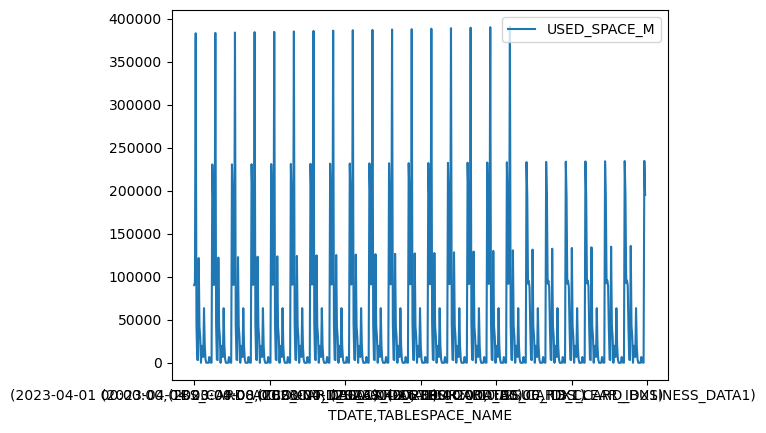

In [ ]:
#oracle tablespace size monitor hourly test
import cx_Oracle as ora
import pandas as pd
import matplotlib.pyplot as plt

tns = '10.66.5.27:1521/hnacard_standby1'
uname = 'moonkin'
upwd = 'QgpdFsAI8GXPCL3p'

db_moonkin = ora.connect(uname, upwd, tns)
#print(db_moonkin.version)
tablespace_sql = "select trunc(time, 'dd') as tdate, tablespace_name, used_space_m from TOTAL_SPACE where time > trunc(sysdate, 'mm') order by tdate , used_space_m desc"
tablespace_df = pd.read_sql(tablespace_sql, db_moonkin)
print(tablespace_df)
tablespace_df = pd.pivot_table(tablespace_df, values=[u'USED_SPACE_M'], index=[ u'TDATE', u'TABLESPACE_NAME'])
print(tablespace_df)

tablespace_df.plot(kind='line')
plt.show()


In [5]:
#file work
import pandas as pd
import datetime
 # 判断 DataFrame 是否为空
def is_dataframe_empty(df):
    return df.empty
 # 设置 DataFrame
# df2 = pd.DataFrame()
 # 如果 DataFrame 为空，输出结果为空
if is_dataframe_empty(df2):
    print('data is null')
else:
    # 获取昨天日期
    yesterday = datetime.date.today() - datetime.timedelta(days=1)
    # 将 DataFrame 导出到 Excel 文件中
    writer = pd.ExcelWriter('OTA{}.xlsx'.format(yesterday.strftime('%Y%m%d')))
    df2.to_excel(writer, index=False)
    writer.save()

data is null


In [10]:

#df5 = np.random.rand(3, 3)
sql3 = """
select * from CARD_BUSINESS.T_HTTP_RECORD_INFO t where rownum < 10
"""
df4 = pd.read_sql(sql3, db)
yesterday = datetime.date.today() - datetime.timedelta(days=1)
writer = pd.ExcelWriter('OTA{}.xlsx'.format(yesterday.strftime('%Y%m%d')))
df4.to_excel(writer, index=False)
writer.save()

In [ ]:
#auto mail
import smtplib
import email
# 负责构造文本
from email.mime.text import MIMEText
# 负责构造图片
from email.mime.image import MIMEImage
# 负责将多个对象集合起来
from email.mime.multipart import MIMEMultipart
from email.header import Header

# SMTP服务器,这里使用163邮箱
mail_host = "smtp.163.com"
# 发件人邮箱
mail_sender = "******@163.com"
# 邮箱授权码,注意这里不是邮箱密码,如何获取邮箱授权码,请看本文最后教程
mail_license = "********"
# 收件人邮箱，可以为多个收件人
mail_receivers = ["******@qq.com","******@outlook.com"]

mm = MIMEMultipart('related')

# 邮件主题
subject_content = """Python邮件测试"""
# 设置发送者,注意严格遵守格式,里面邮箱为发件人邮箱
mm["From"] = "sender_name<******@163.com>"
# 设置接受者,注意严格遵守格式,里面邮箱为接受者邮箱
mm["To"] = "receiver_1_name<******@qq.com>,receiver_2_name<******@outlook.com>"
# 设置邮件主题
mm["Subject"] = Header(subject_content,'utf-8')

# 邮件正文内容
body_content = """你好，这是一个测试邮件！"""
# 构造文本,参数1：正文内容，参数2：文本格式，参数3：编码方式
message_text = MIMEText(body_content,"plain","utf-8")
# 向MIMEMultipart对象中添加文本对象
mm.attach(message_text)

# 二进制读取图片
image_data = open('a.jpg','rb')
# 设置读取获取的二进制数据
message_image = MIMEImage(image_data.read())
# 关闭刚才打开的文件
image_data.close()
# 添加图片文件到邮件信息当中去
mm.attach(message_image)

# 构造附件
atta = MIMEText(open('sample.xlsx', 'rb').read(), 'base64', 'utf-8')
# 设置附件信息
atta["Content-Disposition"] = 'attachment; filename="sample.xlsx"'
# 添加附件到邮件信息当中去
mm.attach(atta)

# 创建SMTP对象
stp = smtplib.SMTP()
# 设置发件人邮箱的域名和端口，端口地址为25
stp.connect(mail_host, 25)  
# set_debuglevel(1)可以打印出和SMTP服务器交互的所有信息
stp.set_debuglevel(1)
# 登录邮箱，传递参数1：邮箱地址，参数2：邮箱授权码
stp.login(mail_sender,mail_license)
# 发送邮件，传递参数1：发件人邮箱地址，参数2：收件人邮箱地址，参数3：把邮件内容格式改为str
stp.sendmail(mail_sender, mail_receivers, mm.as_string())
print("邮件发送成功")
# 关闭SMTP对象
stp.quit()

In [1]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

# automail test
    # Set up email addresses and password
sender_address = 'hnapay11@new.hnapay.com'
sender_pass = '411TES@LRB8vi29O'
#    receiver_address = ['xiaoch.chen@hnagroup.com', 'manyi@hnagroup.com', 'yish.he@hnagroup.com']
receiver_address = ['yu_sun@hnagroup.com']

    # Set up the MIME
message = MIMEMultipart()
message['From'] = sender_address
message['To'] = ", ".join(receiver_address)
message['Subject'] = 'pyautomail test'

    # Create the body of the message (a plain-text and an HTML version)
text = "The data you wanted is null               ------This is a test message from pyautomail.fkbjob, don't reply to this email-----"

    # Add HTML/plain-text parts to MIMEMultipart message
message.attach(MIMEText(text, 'plain'))

    # Create SMTP session for sending the mail
session = smtplib.SMTP('smtp.qiye.163.com', 587)  # use gmail with port
session.starttls()  # enable security
session.login(sender_address, sender_pass)  # login with mail_id and password
text = message.as_string()
session.sendmail(sender_address, receiver_address, text)
session.quit()

(221, b'2.0.0 Bye')

In [ ]:
import pandas as pd
import datetime
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

# Read the dataframe from a file or create it
#df2 = pd.read_csv('filename.csv')

# Check if there are any null values in the dataframe
if df2.isnull().values.any():
    print("is null")
    # Set up email addresses and password
    sender_address = 'hnapay11@new.hnapay.com'
    sender_pass = '411TES@LRB8vi29O'
#    receiver_address = ['xiaoch.chen@hnagroup.com', 'manyi@hnagroup.com', 'yish.he@hnagroup.com']
    receiver_address = ['yu_sun@hnagroup.com']

    # Set up the MIME
    message = MIMEMultipart()
    message['From'] = sender_address
    message['To'] = ", ".join(receiver_address)
    message['Subject'] = 'Dataframe is null'

    # Create the body of the message (a plain-text and an HTML version)
    text = "The data you wanted is null               ------This is a test message from pyautomail.fkbjob, don't reply to this email-----"

    # Add HTML/plain-text parts to MIMEMultipart message
    message.attach(MIMEText(text, 'plain'))

    # Create SMTP session for sending the mail
    session = smtplib.SMTP('ismtp.hnair.com', 587)  # use gmail with port
    session.starttls()  # enable security
    session.login(sender_address, sender_pass)  # login with mail_id and password
    text = message.as_string()
    session.sendmail(sender_address, receiver_address, text)
    session.quit()
else:
    # Export df2 to excel and name it OTA + yesterday's date
    yesterday = datetime.date.today() - datetime.timedelta(days=1)
    filename = "OTA" + str(yesterday) + ".xlsx"
    df2.to_excel(filename, index=False)

    # Set up email addresses and password
    sender_address = 'abc@123.com'
    sender_pass = 'password'
    receiver_address = ['abc@123.com', 'cba@456.com']

    # Set up the MIME
    message = MIMEMultipart()
    message['From'] = sender_address
    message['To'] = ", ".join(receiver_address)
    message['Subject'] = 'Dataframe is not null'

    # Create the body of the message (a plain-text and an HTML version)
    text = "Dataframe is not null"

    # Add HTML/plain-text parts to MIMEMultipart message
    message.attach(MIMEText(text, 'plain'))

    # Open the file in bynary
    with open(filename, 'rb') as f:
        attach = MIMEApplication(f.read(),_subtype='xlsx')
        attach.add_header('Content-Disposition','attachment',filename=str(filename))
        message.attach(attach)

    # Create SMTP session for sending the mail
    session = smtplib.SMTP('smtp.gmail.com', 587)  # use gmail with port
    session.starttls()  # enable security
    session.login(sender_address, sender_pass)  # login with mail_id and password
    text = message.as_string()
    session.sendmail(sender_address, receiver_address, text)
    session.quit()



In [ ]:
import pandas as pd
import datetime
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

text = """
The data you wanted is null\n
------This is a test message from pyautomail.fkbjob, don't reply to this email-----
"""

def auto_mail(text):
    '''send a mail to several users
    '''
    sender_address = 'hnapay11@new.hnapay.com'
    sender_pass = '411TES@LRB8vi29O'
#    receiver_address = ['xiaoch.chen@hnagroup.com', 'manyi@hnagroup.com', 'yish.he@hnagroup.com']
    receiver_address = ['yu_sun@hnagroup.com']

    # Set up the MIME
    message = MIMEMultipart()
    message['From'] = sender_address
    message['To'] = ", ".join(receiver_address)
    message['Subject'] = 'Dataframe is null'

    # Create the body of the message (a plain-text and an HTML version)
    #text = "The data you wanted is null               ------This is a test message from pyautomail.fkbjob, don't reply to this email-----"

    # Add HTML/plain-text parts to MIMEMultipart message
    message.attach(MIMEText(text, 'plain'))

    # Create SMTP session for sending the mail
    session = smtplib.SMTP('ismtp.hnair.com', 587)  # use gmail with port
    session.starttls()  # enable security
    session.login(sender_address, sender_pass)  # login with mail_id and password
    text = message.as_string()
    
    #send mail
    try:     
        smtpObj = smtplib.SMTP('ismtp.hnair.com', 587)
        smtpObj.sendmail(sender_address, receiver_address, message.as_string())
        print("Successfully sent email")
        smtpObj.quit()
        return 1
    except smtplib.SMTPException:
        print("Error: unable to send email")
        return 0
    '''
    session.sendmail(sender_address, receiver_address, text)
    session.quit()
    return 'Mail Sent'
    '''
    

In [9]:
import datetime
yesterday = datetime.date.today() - datetime.timedelta(days=1)
print(yesterday)
yesterday = str(yesterday)
yesterday1 = yesterday.replace('-', '')
print(yesterday)
print(yesterday1)

text = """
您好，\n    """+yesterday+"""的OTA没有失败的通知结果，请知悉\n\n\n
    ------This is a test message from pyautomail.fkbjob, don't reply to this email-----
"""
print(text)    

2023-05-04
2023-05-04
20230504

您好，
    2023-05-04的OTA没有失败的通知结果，请知悉



    ------This is a test message from pyautomail.fkbjob, don't reply to this email-----



In [2]:
#send file into mail
import datetime
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

'''date generated'''
yesterday = datetime.date.today() - datetime.timedelta(days=1)
'''delete - in yesterday   '''
yesterday = str(yesterday)
yesterday1 = yesterday.replace('-', '')
#filename = "OTA" + str(yesterday1) + ".xlsx"
filename = "OTA20230423.xlsx"

# Set up email addresses and password
sender_address = 'hnapay11@new.hnapay.com'
sender_pass = '411TES@LRB8vi29O'
#    receiver_address = ['xiaoch.chen@hnagroup.com', 'manyi@hnagroup.com', 'yish.he@hnagroup.com']
receiver_address = ['yu_sun@hnagroup.com']

# Set up the MIME
message = MIMEMultipart()
message['From'] = sender_address
message['To'] = ", ".join(receiver_address)
message['Subject'] = yesterday1+" ota test"

    # Create the body of the message (a plain-text and an HTML version)
text = "The data you wanted is not null, see files attached\n              ------This is a test message from pyautomail.fkbjob, don't reply to this email-----"

# Add HTML/plain-text parts to MIMEMultipart message
message.attach(MIMEText(text, 'plain'))

# Open the file in bynary
with open(filename, 'rb') as f:
    attach = MIMEApplication(f.read(),_subtype='xlsx')
    attach.add_header('Content-Disposition','attachment',filename=str(filename))
    message.attach(attach)

    # Create SMTP session for sending the mail
session = smtplib.SMTP('smtp.qiye.163.com', 587)  # use gmail with port
session.starttls()  # enable security
session.login(sender_address, sender_pass)  # login with mail_id and password
text = message.as_string()
session.sendmail(sender_address, receiver_address, text)
session.quit()


(221, b'2.0.0 Bye')

In [8]:
import datetime
#print nowtime and some log
time = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
stamp = datetime.datetime.now().timestamp()
print(str(time)+' '+str(stamp)+" [INFO] Start to run the program")

2023-05-09 15:15:07 1683616507.709929 [INFO] Start to run the program
